In [1]:
!git clone https://github.com/adamserag1/Interpretability-for-VRDU-models.git

Cloning into 'Interpretability-for-VRDU-models'...
remote: Enumerating objects: 700, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 700 (delta 32), reused 32 (delta 14), pack-reused 634 (from 1)
Receiving objects: 100% (700/700), 15.58 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (368/368), done.


In [34]:
!git pull https://github.com/adamserag1/Interpretability-for-VRDU-models.git

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 436 bytes | 436.00 KiB/s, done.
From https://github.com/adamserag1/Interpretability-for-VRDU-models
 * branch            HEAD       -> FETCH_HEAD
Updating 271de55..a7b0fe7
Fast-forward
 vrdu_utils/utils.py | 2 ++
 1 file changed, 2 insertions(+)


#config

In [2]:
!pwd

/content


In [3]:
%cd /content/Interpretability-for-VRDU-models

/content/Interpretability-for-VRDU-models


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.7.0
    Uninstalling fsspec-2025.7.0:
      Successfully uninstalled fsspec-2025.7.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.7.0 requires fsspec==2025.7.0, but you have fsspec 2025.3.0 which is incompatible.


#code

In [6]:
from datasets import load_from_disk
from transformers import LayoutLMv3ForSequenceClassification, AutoProcessor
import sys
import importlib
def reload_modules():
    for module in list(sys.modules.keys()):
        if module.startswith('vrdu_utils') or module.startswith('Classification_Explain'):
            print(f"Reloading module: {module}")
            importlib.reload(sys.modules[module])

reload_modules()

from vrdu_utils.encoders import *
from Classification_Explain.lime import *
from vrdu_utils.utils import *
import torch
from torch.utils.data import DataLoader
from transformers import LayoutLMv3ForSequenceClassification, AutoProcessor, BrosPreTrainedModel, BrosModel, AutoConfig, AutoTokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


import warnings
from transformers import logging as hf_logging

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module="transformers.modeling_utils",   # the module that emits the msg
)
hf_logging.set_verbosity_error()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp -r /content/drive/MyDrive/THESIS/rvl_cdip_financial_subset /content

In [9]:
from torch import nn
class BrosForDocumentClassification(BrosPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.bros = BrosModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        bbox=None,
        attention_mask=None,
        token_type_ids=None,
        labels=None,
        **kwargs
    ):
        outputs = self.bros(
            input_ids=input_ids,
            bbox=bbox,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
        )

        # Use the [CLS] token's representation (first token)
        cls_output = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, hidden_size)

        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return {
            "loss": loss,
            "logits": logits,
        }

In [10]:
bros_config = AutoConfig.from_pretrained(
    "adamadam111/bros-docclass-finetuned-frz",
    num_labels=5,
    id2label={0: "form", 1: "invoice", 2: "budget", 3: "file folder", 4: "questionnaire"},
    label2id={"form": 0, "invoice": 1, "budget": 2, "file folder": 3, "questionnaire": 4}
)

BROS = BrosForDocumentClassification.from_pretrained(
    "adamadam111/bros-docclass-finetuned-frz",
    config=bros_config
)
BROS_t = AutoTokenizer.from_pretrained("adamadam111/bros-docclass-finetuned-frz",do_lower_case=True)

LLMV3 = LayoutLMv3ForSequenceClassification.from_pretrained("adamadam111/layoutlmv3-docclass-finetuned-frz",
                                                            num_labels=5,
                                                            id2label={0: "form", 1: "invoice", 2: "budget", 3: "file folder", 4: "questionnaire"},
                                                            label2id={"form": 0, "invoice": 1, "budget": 2, "file folder": 3, "questionnaire": 4})
LLMV3_p =AutoProcessor.from_pretrained("adamadam111/layoutlmv3-docclass-finetuned-frz", apply_ocr=False)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/966 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [11]:
LLMV3_encode = make_layoutlmv3_encoder(LLMV3_p, ner=False)
BROS_encode = make_bros_encoder(BROS_t, ner=False)

In [12]:
ds = load_from_disk("/content/rvl_cdip_financial_subset")
split = ds.train_test_split(test_size=0.2, shuffle=True, seed=42)
val = split["test"]

In [43]:
def make_dl(ds, bs=8):
  return DataLoader(ds, batch_size=bs, collate_fn=lambda x: x)

#val = val.filter(lambda example, idx: idx != 159, with_indices=True)
val = val.filter(lambda example, idx: idx != 715, with_indices=True)
val_ds = DocSampleDataset(val)
dl = make_dl(val_ds)
encoders = {
    "lmv3" : LLMV3_encode,
    "bros" : BROS_encode
}

Filter:   0%|          | 0/998 [00:00<?, ? examples/s]

In [27]:
val_ds.pop(159)

AttributeError: 'DocSampleDataset' object has no attribute 'pop'

In [44]:
from tqdm import tqdm

models = {
    "lmv3" : LLMV3.eval().to("cuda"),
    "bros" : BROS.eval().to("cuda")
}


records = []

@torch.no_grad()
def sweep(dl, ds_name):
  for batch in tqdm(dl, desc="finding samples"):
    # The batch now contains tuples of (DocSample, original_index)
    samples = [item[0] for item in batch]
    indices = [item[1] for item in batch]

    for mname, model in models.items():
      enc = make_layoutlmv3_encoder(LLMV3_p) if mname=="lmv3" else make_bros_encoder(BROS_t)
      outputs = model(**enc(samples, device)) # Pass only samples to the encoder
      logits = outputs['logits'] if isinstance(outputs, dict) else outputs.logits # (B, n_cls)
      probs  = logits.softmax(-1).cpu()
      for i, (samp, p) in enumerate(zip(samples, probs)):
        records.append(dict(
            ds = ds_name,
            # Use the original index as file_id
            file_id = indices[i],
            true_label = samp.label,
            model = mname,
            pred = p.argmax().item(),
            conf = p.max().item(),
        ))

sweep(dl, "rvl_cdip_financial_subset")

finding samples: 100%|██████████| 125/125 [01:52<00:00,  1.11it/s]


In [45]:
import pandas as pd
df = pd.DataFrame(records)
wide = (df.pivot(index=["ds","file_id","true_label"],
                 columns="model", values=["pred","conf"])
          .reset_index())
wide.columns = ["ds","file_id","true",
                "pred_bros","pred_lmv3",
                "conf_bros","conf_lmv3"]
agree = wide.query("pred_bros==true and pred_lmv3==true")
disagree = wide.query("pred_bros!=pred_lmv3")

sample_agree = (agree
                .assign(margin=lambda d: d[["conf_bros","conf_lmv3"]].min(1))
                .sort_values("margin", ascending=False)
                .iloc[0])

sample_disagree = (disagree
                   .assign(avg_conf=lambda d: d[["conf_bros","conf_lmv3"]].mean(1))
                   .sort_values("avg_conf", ascending=False)
                   .iloc[0])
print(sample_agree)
print(sample_disagree)

ds           rvl_cdip_financial_subset
file_id                            844
true                                 4
pred_bros                          4.0
pred_lmv3                          4.0
conf_bros                     0.997128
conf_lmv3                     0.996823
margin                        0.996823
Name: 844, dtype: object
ds           rvl_cdip_financial_subset
file_id                            119
true                                 4
pred_bros                          4.0
pred_lmv3                          0.0
conf_bros                     0.979912
conf_lmv3                     0.982567
avg_conf                       0.98124
Name: 119, dtype: object


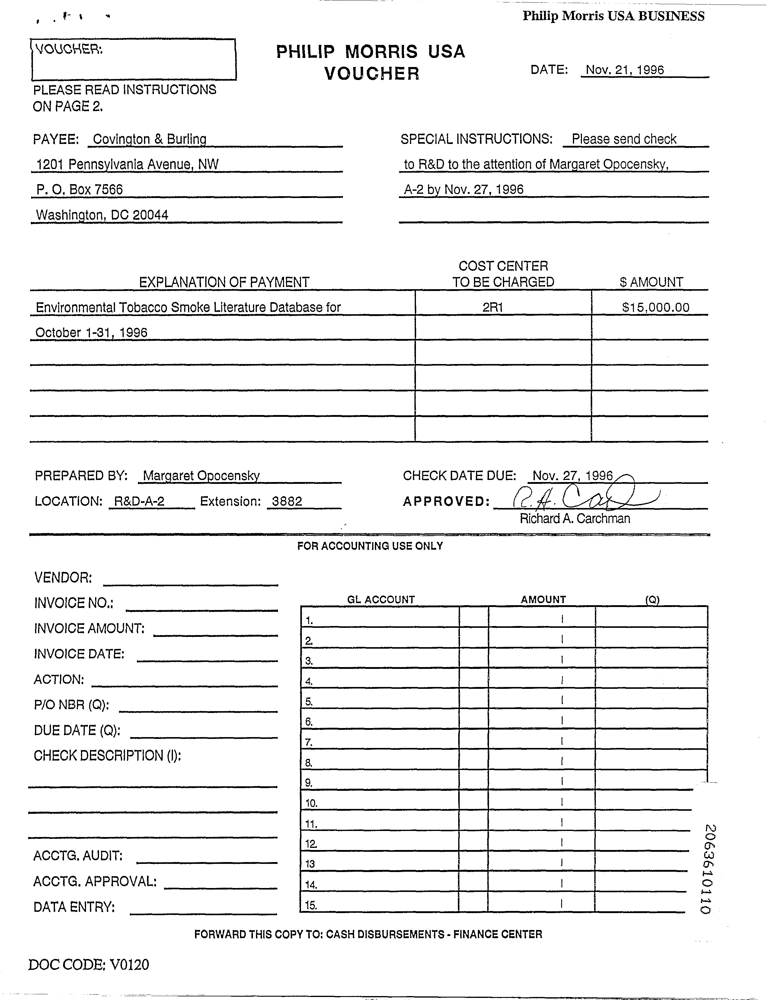

In [55]:
val_ds[715][0].image

In [75]:
def predict_one(model, encode_fn, sample):
    model.eval()
    with torch.no_grad():
        outputs = model(**encode_fn([sample], device))         # (n_cls,)
        logits = outputs['logits'] if isinstance(outputs, dict) else outputs.logits # (B, n_cls)
        prob   = logits.softmax(-1)
    cls_id  = prob.argmax().item()
    conf    = prob.max().item()
    return cls_id, conf
ID2NAME = {0:"form", 1:"invoice", 2:"budget", 3:"file folder", 4:"questionnaire"}

def quick_check(sample, name="page"):
    for tag in models:                         # iterate over the keys once
        model = models[tag]
        enc   = encoders[tag]
        cls, conf = predict_one(model, enc, sample)
        print(f"{name:>8} | {tag:5} → {ID2NAME[cls]:12s}  (p = {conf:.4f})")

In [68]:
val_docsam = DocSampleDataset(val)
agree = val_docsam[108]
disagree = val_docsam[100]

In [77]:
quick_check(agree[0],  "agree")
quick_check(disagree[0],  "clash")

   agree | lmv3  → budget        (p = 0.9999)
   agree | bros  → budget        (p = 0.9989)
   clash | lmv3  → file folder   (p = 0.9998)
   clash | bros  → budget        (p = 0.9989)
